In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv

--2021-09-29 15:19:52--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data-week-3.csv'

     0K .......... .......... .......... .......... ..........  5% 1.60M 1s
    50K .......... .......... .......... .......... .......... 10% 5.27M 0s
   100K .......... .......... .......... .......... .......... 15% 3.70M 0s
   150K .......... .......... .......... .......... .......... 20% 9.76M 0s
   200K .......... .......... .......... .......... .......... 26% 2.07M 0s
   250K .......... .......... .......... .......... .......... 31% 69.2M 0s
   300K .......... .......... .......... ....

In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [10]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

In [11]:
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [12]:
df['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [13]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [14]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [15]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [16]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [17]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')

In [18]:
df.totalcharges.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: totalcharges, Length: 7043, dtype: bool

In [19]:
df[df.totalcharges.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [20]:
df.totalcharges = df.totalcharges.fillna(0)

In [21]:
df[df.totalcharges.isnull()][['customerid','totalcharges']]

,customerid,totalcharges


In [22]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [23]:
df.churn = (df.churn=='yes').astype(int)

In [24]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

Setting up Validation framework


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_full_train,df_test = train_test_split(df,test_size = 0.2,random_state = 1)

In [27]:
len(df_full_train),len(df_test)

(5634, 1409)

In [28]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [29]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [30]:
#resetindex
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#target_variables
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

#delete_target_values_from_dataframe
del df_train['churn']
del df_val['churn']
del df_test['churn']




EDA - NUMERICAL AND CATEGORICAL VARIABLES

In [31]:
df_full_train = df_full_train.reset_index(drop=True)

In [32]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [33]:
global_churn_rate = df_full_train.churn.mean()

In [34]:
round(global_churn_rate,2)

0.27

In [35]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [36]:
numerical = ['tenure','monthlycharges','totalcharges']

In [37]:
categorical =['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice',
        'multiplelines', 'internetservice',
        'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
        'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
        'paymentmethod'] 

In [38]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature Importance: Churn Rate And Risk Ratio

Churn rate

In [39]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [40]:
churn_female = df_full_train[df_full_train.gender=='female'].churn.mean()
churn_female

0.27682403433476394

In [41]:
churn_male = df_full_train[df_full_train.gender=='male'].churn.mean()
churn_male

0.2632135306553911

In [42]:
churn_with_partner = df_full_train[df_full_train.partner =='yes'].churn.mean()
churn_with_partner


0.20503330866025166

In [43]:
churn_no_partner = df_full_train[df_full_train.partner =='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [44]:
global_churn_rate

0.26996805111821087

Risk Ratio


Risk = Group/Global

If Risk >1 - More likely to churn
If Risk<1 - Less likely to churn

In [45]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [46]:
from IPython.display import display

In [47]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean']/global_churn_rate
    display(df_group)
    print('\n')
    



gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Feature Importance: Mutual Information

Mutual information- concept from information theory, it tells us how much we can learn about one variable if we know the value of another
* https://en.wikipedia.org/wiki/Mutual_ information

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
#same regardless of the order of arguments
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [51]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)


In [52]:
mutual_info = df_full_train[categorical].apply(mutual_info_churn_score)

In [53]:
mutual_info.sort_values(ascending= False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [54]:
mutual_info.gender

0.0001174846211139946

3.7 Feature importance: Correlation

How about numerical columns?

Correlation coefficient- https://en.wikipedia.org/wikiPearson_correlation_coefficient

In [55]:
df_full_train.tenure.max()

72

In [56]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [57]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [58]:
df_full_train[df_full_train.tenure >3].churn.mean()

0.21706398996235884

3.8 One-hot encoding


Use Scikit-Learn to encode categorical features

In [59]:
#one-hot-encoding with sklearn
from sklearn.feature_extraction import DictVectorizer


In [60]:
df_train[['gender','contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [61]:
#converting to dictionary
train_dicts = df_train[categorical + numerical].to_dict(orient='records')


In [62]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [63]:
dv = DictVectorizer(sparse = False)

In [64]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [65]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [66]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [67]:
X_train.shape

(4225, 45)

In [68]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [69]:
X_val = dv.transform(val_dicts)

In [70]:
X_val.shape

(1409, 45)

3.9 Logistic regression

Binary classification

Linear vs logistic regression

In [71]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [72]:
z = np.linspace(-7.5,8,61)

In [73]:
sigmoid(z)

array([5.52778637e-04, 7.15604779e-04, 9.26348438e-04, 1.19908106e-03,
       1.55198603e-03, 2.00854661e-03, 2.59906776e-03, 3.36261964e-03,
       4.34950893e-03, 5.62440406e-03, 7.27025813e-03, 9.39318444e-03,
       1.21284350e-02, 1.56475961e-02, 2.01670239e-02, 2.59573572e-02,
       3.33536123e-02, 4.27648189e-02, 5.46813172e-02, 6.96766690e-02,
       8.83996772e-02, 1.11550540e-01, 1.39834327e-01, 1.73885933e-01,
       2.14165017e-01, 2.60828537e-01, 3.13601921e-01, 3.71683812e-01,
       4.33725606e-01, 4.97916679e-01, 5.62176501e-01, 6.24415688e-01,
       6.82799386e-01, 7.35945394e-01, 7.83016649e-01, 8.23706879e-01,
       8.58148935e-01, 8.86786951e-01, 9.10247991e-01, 9.29235188e-01,
       9.44450740e-01, 9.56547691e-01, 9.66104836e-01, 9.73617904e-01,
       9.79500990e-01, 9.84093608e-01, 9.87670244e-01, 9.90450458e-01,
       9.92608459e-01, 9.94281611e-01, 9.95577715e-01, 9.96581060e-01,
       9.97357367e-01, 9.97957766e-01, 9.98421972e-01, 9.98780791e-01,
      

In [74]:
#without_sigmoid
def linear_reg(xi):
    result = W0

    for i in range(len(w)):
        result = result + xi[i]*w[i]
    return result


In [75]:
#with_sigmoid
def linear_reg(xi):
    result = W0

    for i in range(len(w)):
        result = result + xi[i]*w[i]
    score = sigmoid(result)
    return score

3.10 Training logistic regression with Scikit-Learn

Train a model with Scikit-Learn

Apply it to the validation dataset

Calculate the accuracy

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_train,y_train)

LogisticRegression()

In [79]:
#bias_term
model.intercept_

array([-0.10903758])

In [80]:
#weights_terms
model.coef_


array([[ 4.74719535e-01, -1.74870020e-01, -4.07532126e-01,
        -2.96849478e-02, -7.79976621e-02,  6.26859040e-02,
        -8.89769353e-02, -8.13915786e-02, -3.43123239e-02,
        -7.33702860e-02, -3.35204574e-01,  3.16498900e-01,
        -8.89769353e-02,  3.67466529e-03, -2.58140670e-01,
         1.41436236e-01,  9.02182437e-03,  6.25324839e-02,
        -8.89769353e-02, -8.12381585e-02,  2.65585278e-01,
        -8.89769353e-02, -2.84290953e-01, -2.31209398e-01,
         1.23526788e-01, -1.66020934e-01,  5.83383240e-02,
        -8.70078334e-02, -3.20586331e-02,  7.04908467e-02,
        -5.91069901e-02,  1.41436236e-01, -2.49118846e-01,
         2.15471357e-01, -1.20360509e-01, -8.89769353e-02,
         1.01654834e-01, -7.08909053e-02, -8.89769353e-02,
         5.21852307e-02,  2.13382385e-01, -8.89769353e-02,
        -2.32088059e-01, -7.04076476e-02,  3.82392561e-04]])

In [81]:
y_pred = model.predict_proba(X_val)[:,1]

In [82]:
y_pred.shape

(1409,)

In [83]:
churn_decision = y_pred >=0.5

In [84]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [85]:
churn_decision.shape

(1409,)

In [86]:
(y_val==churn_decision).mean()

0.8034066713981547

4.2 Accuracy and dummy model

Evaluate the model on different thresholds

Check the accuracy of dummy baselines

In [87]:
len(y_val)

1409

In [88]:
(y_val==churn_decision).sum()

1132

In [89]:
y_pred

array([0.0089966 , 0.2045094 , 0.21221   , ..., 0.13638725, 0.79976953,
       0.83740665])

In [90]:
(y_val==churn_decision).sum()/len(y_val)

0.8034066713981547

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val,y_pred>=t).mean()
    print("%.2f %.3f" %(t,score))
    scores.append(score)



0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [93]:
scores

[0.2739531582682754,
 0.5088715400993612,
 0.5911994322214337,
 0.6664300922640171,
 0.7097232079489,
 0.7388218594748048,
 0.7601135557132718,
 0.7721788502484032,
 0.7849538679914834,
 0.7934705464868701,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.765791341376863,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

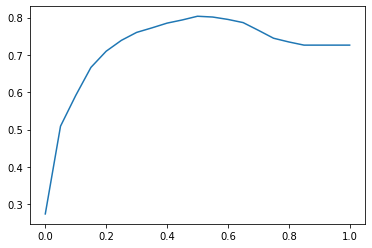

In [94]:
plt.plot(thresholds,scores)

In [95]:
from collections import Counter

In [96]:
Counter(y_pred>=1)

Counter({False: 1409})

In [97]:
Counter(y_pred<0.5),Counter(y_pred>=0.5)

(Counter({True: 1098, False: 311}), Counter({False: 1098, True: 311}))

In [98]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [99]:
386/1023

0.37732160312805474

4.3 Confusion table

Different types of erors and correct decisions

Arranging them in a table

In [100]:
actual_positive = (y_val ==1)
actual_negative = (y_val ==0)


In [101]:
sum(actual_positive)

386

In [102]:
sum(actual_negative)

1023

In [103]:
t = 0.5
predict_positve = (y_pred>=t)
predict_negative = (y_pred<t)

In [104]:
true_positive = (predict_positve & actual_positive).sum()
false_positive =(predict_positve & actual_negative).sum()

In [105]:
true_negative = (predict_negative & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()

In [106]:
true_positive,false_positive

(210, 101)

In [107]:
true_negative,false_negative

(922, 176)

In [108]:
confusion_matrix = np.array([[true_negative,false_positive],[false_negative,true_positive]]) 

In [109]:
confusion_matrix

array([[922, 101],
       [176, 210]])

In [110]:
pd.DataFrame(confusion_matrix,index=['Actual Negative','Actual Positive'],columns = ['Pred Negative','Pred Positive'])

,Pred Negative,Pred Positive
Actual Negative,922,101
Actual Positive,176,210


In [111]:
confusion_matrix/confusion_matrix.sum()

array([[0.6543648 , 0.07168204],
       [0.12491128, 0.14904187]])

In [112]:
confusion_matrix

array([[922, 101],
       [176, 210]])

4.4 Precision and Recall


In [113]:
(true_positive+true_negative)/confusion_matrix.sum()

0.8034066713981547

In [114]:
precision = true_positive/(true_positive + false_positive)

In [115]:
precision

0.6752411575562701

In [116]:
recall = true_positive/(true_positive+false_negative)

In [117]:
recall

0.5440414507772021

In [118]:
#percentage of population we failed to identify as churning

1 -recall

0.4559585492227979

## 4.5 ROC Curves


TPR and FRP

In [119]:
tpr = true_positive/(true_positive + false_negative)
tpr

0.5440414507772021

In [120]:
fpr = false_positive/(false_positive + true_negative)
fpr

0.09872922776148582

In [121]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive =  (y_val==1)
    actual_negative = (y_val==0)

    predict_positve = (y_pred>=t)
    predict_negative = (y_pred<t)

    tp= (predict_positve & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positve & actual_negative).sum()
    fn  = (predict_negative & actual_positive).sum ()

    scores.append((t,tp,fp,fn,tn))

scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [122]:
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores,columns = columns)




df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [123]:
#print incremented values from the dataframe df_scores
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [124]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)

In [125]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.997409,0.892473
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


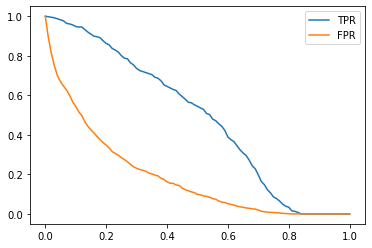

In [126]:
plt.plot(df_scores.threshold,df_scores['tpr'],label='TPR')
plt.plot(df_scores.threshold,df_scores['fpr'],label='FPR')
plt.legend()
plt.show()


## Random Model


In [127]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [128]:
((y_rand>=0.5) == y_val).mean()

0.5017743080198722

In [129]:
def tpr_fpr_df(y_val,y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive =  (y_val==1)
        actual_negative = (y_val==0)

        predict_positve = (y_pred>=t)
        predict_negative = (y_pred<t)

        tp= (predict_positve & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positve & actual_negative).sum()
        fn  = (predict_negative & actual_positive).sum ()

        scores.append((t,tp,fp,fn,tn))
    
    columns = ['threshold','tp','fp','fn','tn']
    df_scores = pd.DataFrame(scores,columns = columns)

    df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)

    return df_scores
        

In [130]:
df_rand = tpr_fpr_df(y_val,y_rand)

In [131]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


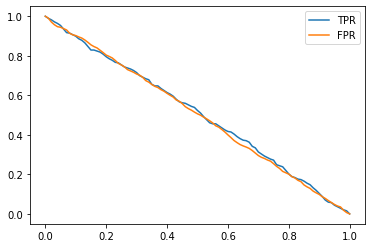

In [132]:
plt.plot(df_rand.threshold,df_rand['tpr'],label='TPR')
plt.plot(df_rand.threshold,df_rand['fpr'],label='FPR')
plt.legend()
plt.show()

Idea model

In [133]:
num_neg = (y_val ==0).sum()
num_pos = (y_val ==1).sum()
num_neg,num_pos

(1023, 386)

In [134]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal


array([0, 0, 0, ..., 1, 1, 1])

In [135]:
y_ideal_pred = np.linspace(0,1,len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [136]:
(y_val==0).mean()

0.7260468417317246

In [137]:
(y_ideal_pred>=0.726).mean()

0.2739531582682754

In [138]:
y_ideal.mean()

0.2739531582682754

In [139]:
((y_ideal_pred>=0.726)==y_ideal).mean()

1.0

In [140]:
df_ideal = tpr_fpr_df(y_ideal,y_ideal_pred)

In [141]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


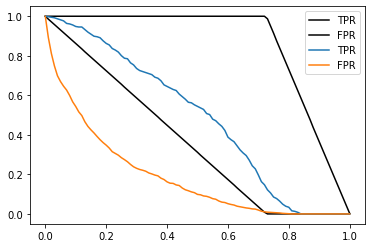

In [142]:
plt.plot(df_ideal.threshold,df_ideal['tpr'],label='TPR',color = 'black')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label='FPR',color = 'black')


#plt.plot(df_rand.threshold,df_rand['tpr'],label='TPR')
#plt.plot(df_rand.threshold,df_rand['fpr'],label='FPR')


plt.plot(df_scores.threshold,df_scores['tpr'],label='TPR')
plt.plot(df_scores.threshold,df_scores['fpr'],label='FPR')

plt.legend()

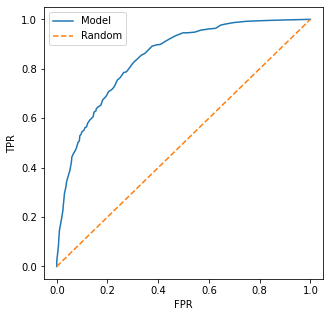

In [155]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr,df_scores.tpr,label='Model')
plt.plot([0,1],[0,1],label='Random',linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [143]:
from sklearn.metrics import roc_curve

In [156]:
fpr,tpr,thresholds= roc_curve(y_val,y_pred)

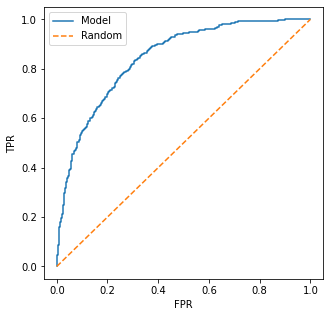

In [157]:
plt.figure(figsize=(5,5))

plt.plot(fpr,tpr,label='Model')
plt.plot([0,1],[0,1],label='Random',linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()